In [2]:
import sys
sys.path.insert(1, '/cndd3/dburrows/CODE/admin_tools/')
from admin_tools import admin_functions as adm
%load_ext autoreload
import os

In [3]:
os.chdir('/cndd3/dburrows/DATA/public_datasets/10x.NSCLC_tumour.5p/ATEM/cluster14/')

In [5]:
import json
import pandas as pd
import pyranges as pr
import sys
import numpy as np
import glob

#Import your modules
#---------------------------------------
sys.path.insert(1, '/cndd3/dburrows/CODE/te_ageing/')
import te_rna_f as te
sys.path.insert(1, '/cndd3/dburrows/CODE/admin_tools/')
from admin_tools import admin_functions as adm

bed_pl = pd.read_csv('/cndd3/dburrows/DATA/te/gtf/bed/rmsk.hg38.filt-5ptrim.plus.sort.bed', sep='\t', header=None)
bed_mi = pd.read_csv('/cndd3/dburrows/DATA/te/gtf/bed/rmsk.hg38.filt-5ptrim.minus.sort.bed',sep='\t', header=None)

#Read in required files for filtering
bed_pl.columns =['Chromosome', 'Start', 'End', 'Strand', 'gene_id', 'family_id', 'class_id', 'length']
bed_pl = bed_pl.drop(columns=['length'])
bed_mi.columns =['Chromosome', 'Start', 'End', 'Strand', 'gene_id', 'family_id', 'class_id', 'length']
bed_mi = bed_mi.drop(columns=['length'])


In [6]:
bam_pl = pr.read_bam('plus.5pfilt.bam', as_df=True) #CHANGE
bam_mi = pr.read_bam('minus.5pfilt.bam', as_df=True) #CHANGE
#Swap Start + End for minus strand
bam_mi['Start'], bam_mi['End'] = bam_mi['End'], bam_mi['Start']

#File checks
assert sum(bam_pl['Strand'] == '+') == len(bam_pl), 'Some non plus strands assigned to plus bam'
assert sum(bam_mi['Strand'] == '-') == len(bam_mi), 'Some non minus strands assigned to minus bam'
assert sum(bed_pl['Strand'] == '+') == len(bed_pl), 'Some non plus strands assigned to plus bed'
assert sum(bed_mi['Strand'] == '-') == len(bed_mi), 'Some non minus strands assigned to minus bed'

#Define + and - strand files
pl_pars = [bed_pl, bam_pl, 'plus.5pfilt.metadata.txt', 'plus'] 
mi_pars = [bed_mi, bam_mi, 'minus.5pfilt.metadata.txt', 'minus'] 
par_list = [pl_pars, mi_pars]


[W::hts_idx_load3] The index file is older than the data file: plus.5pfilt.bam.bai
[W::hts_idx_load3] The index file is older than the data file: plus.5pfilt.bam.bai
[W::hts_idx_load3] The index file is older than the data file: minus.5pfilt.bam.bai
[W::hts_idx_load3] The index file is older than the data file: minus.5pfilt.bam.bai


In [15]:
! ls

minus.5pfilt.bam	   minus.bam		plus.5pfilt.metadata.txt
minus.5pfilt.bam.bai	   plus.5pfilt.bam	plus.bam
minus.5pfilt.metadata.txt  plus.5pfilt.bam.bai	total_reads.txt


In [16]:
pd.read_csv('plus.5pfilt.metadata.txt', sep='\t', header=None)

,0,1,2,3,4,5,6,7,8
0,A00228:122:H5V3FDMXX:1:2352:6171:9048,419,chr1,17977,1,85M6676N65M,=,195347,181899
1,A00228:122:H5V3FDMXX:1:2352:6171:9048,419,chr1,17977,1,85M177201N65M,=,195347,181899
2,A00228:122:H5V3FDMXX:2:2324:24442:29731,419,chr1,18276,0,91M6371N59M,=,195333,181591
3,A00228:122:H5V3FDMXX:2:2324:24442:29731,419,chr1,18276,0,91M176896N59M,=,195333,181591
4,A00228:122:H5V3FDMXX:2:2324:24352:30076,419,chr1,18276,0,91M6371N59M,=,195333,181591
...,...,...,...,...,...,...,...,...,...
89758,A00228:122:H5V3FDMXX:1:1238:32136:36104,1123,chrY,20579689,255,13S3M2898N104M1780N4M,=,20582678,8417
89759,A00228:122:H5V3FDMXX:1:1238:32642:36573,1123,chrY,20579689,255,13S3M2898N104M1780N4M,=,20582678,8417
89760,A00228:122:H5V3FDMXX:1:1264:28339:4413,1123,chrY,20579689,255,13S3M2898N104M1780N4M,=,20582671,8411
89761,A00228:122:H5V3FDMXX:2:2123:18403:30013,1123,chrY,20579689,255,13S3M2898N104M1780N4M,=,20579689,4791


In [14]:
curr_bam

,Chromosome,Start,End,Strand,Flag
0,chr1,17976,24802,+,419
1,chr1,17976,195327,+,419
2,chr1,18275,24796,+,419
3,chr1,18275,195321,+,419
4,chr1,18275,24796,+,419
...,...,...,...,...,...
34290,chrY,12659643,12918221,+,99
34291,chrY,20575797,20579627,+,99
34292,chrY,20575797,20579627,+,99
34293,chrY,20575797,20579627,+,99


In [13]:
curr_name

,0,1,2,3,4,5,6,7,8
0,A00228:122:H5V3FDMXX:1:2352:6171:9048,419,chr1,17977,1,85M6676N65M,=,195347,181899
1,A00228:122:H5V3FDMXX:1:2352:6171:9048,419,chr1,17977,1,85M177201N65M,=,195347,181899
2,A00228:122:H5V3FDMXX:2:2324:24442:29731,419,chr1,18276,0,91M6371N59M,=,195333,181591
3,A00228:122:H5V3FDMXX:2:2324:24442:29731,419,chr1,18276,0,91M176896N59M,=,195333,181591
4,A00228:122:H5V3FDMXX:2:2324:24352:30076,419,chr1,18276,0,91M6371N59M,=,195333,181591
...,...,...,...,...,...,...,...,...,...
89758,A00228:122:H5V3FDMXX:1:1238:32136:36104,1123,chrY,20579689,255,13S3M2898N104M1780N4M,=,20582678,8417
89759,A00228:122:H5V3FDMXX:1:1238:32642:36573,1123,chrY,20579689,255,13S3M2898N104M1780N4M,=,20582678,8417
89760,A00228:122:H5V3FDMXX:1:1264:28339:4413,1123,chrY,20579689,255,13S3M2898N104M1780N4M,=,20582671,8411
89761,A00228:122:H5V3FDMXX:2:2123:18403:30013,1123,chrY,20579689,255,13S3M2898N104M1780N4M,=,20579689,4791


In [11]:
pd.options.mode.chained_assignment = None  # default='warn'
count_df = pd.DataFrame() #empty count matrix
bam_ll = [[],[]] #empty list of lists to store curr_bam indices

# Filter out reads that do not overlap with 5' portion of insertion
for x,par in enumerate(par_list):
    curr_bed = par[0]
    curr_bam = par[1]
    curr_name = pd.read_csv(par[2], sep='\t', header=None)
    assert len(curr_bam) == len(curr_name), 'Bam and metadata files not the same length'
    curr_bam['UMI']=curr_name[0].values #Add UMI column to bam file

    #Loop through each chromosome
    chr_unq = np.unique(curr_bam['Chromosome'].values)
    for i,chr in enumerate(chr_unq):
        print('Aligning to chromosome ' + chr + ' for ' + par[3] + ' strand')
        
        #Slice bed/bam files by chromosome
        chr_bam = curr_bam[curr_bam['Chromosome'] == chr]
        chr_bed = curr_bed[curr_bed['Chromosome'] == chr]
        count_df, bam_ll[x] = te.five_prime_align(chr_bam, chr_bed, count_df, bam_ll[x])

#Add in CPMs as a column
total_reads = pd.read_csv(snakemake.input.n_reads, sep=" ", header=None)[0].values[0] 
count_df['CPM'] = count_df['Count'].values / total_reads * 1000000 

AssertionError: Bam and metadata files not the same length

In [14]:
os.chdir('/cndd3/dburrows/DATA/public_datasets/10x.NSCLC_tumour.5p/sep_bam/')
li = glob.glob('**')
li

['cluster10',
 'cluster5',
 'cluster8',
 'cluster2',
 'cluster13',
 'cluster6',
 'cluster1',
 'cluster14',
 'cluster3',
 'cluster9',
 'cluster4',
 'cluster11',
 'cluster7',
 'cluster12']

In [18]:
for l in li:
    os.chdir(l)
    print(glob.glob('**'))
    #move each bam file into its own folder
    #rename bam file to Aligned.sortedByCoord.out.bam
    os.rename(glob.glob('**.bam')[0], 'Aligned.sortedByCoord.out.bam')
    os.chdir('..')

['cluster10.bam']
['cluster5.bam']
['cluster8.bam']
['cluster2.bam']
['cluster13.bam']
['cluster6.bam']
['cluster1.bam']
['cluster14.bam']
['cluster3.bam']
['cluster9.bam']
['cluster4.bam']
['cluster11.bam']
['cluster7.bam']
['cluster12.bam']


In [ ]:
adm.check_log?

In [ ]:
import glob
os.chdir('/cndd3/dburrows/DATA/te/rna/CZI.counts/ATEM/pseudobulk/CZI19_NOVA_220113/')
glob.glob('*')


In [20]:
adm.check_log?

Signature: adm.check_log(file_name, string)
Docstring:
This function searches for a string in a log file, and returns a boolean if found.

Inputs:
file_name: name of log file to search
string: string to search for

Outputs:    
True if string is found in log file, False if not
File:      /cndd3/dburrows/CODE/admin_tools/admin_tools/admin_functions.py
Type:      function


In [33]:
curr_

['Sample_5936-GABA',
 'Sample_1241-GLU',
 'Sample_Hct16HECA028-GLU',
 'Sample_198035-1765-GLU',
 'Sample_1539-GLU',
 'Sample_5617-GABA',
 'Sample_HctZZNA014-GABA',
 'Sample_4725-GLU',
 'Sample_5976-GLU',
 'Sample_5387-GLU',
 'Sample_4725-GABA',
 'Sample_Hct15HAWA031-GLU',
 'Sample_5936-GLU',
 'Sample_4369-GLU',
 'Sample_Hct15HBMA007-GABA',
 'Sample_5871-GLU',
 'Sample_4411-GLU',
 'Sample_5309-GLU',
 'Sample_5086-GLU',
 'Sample_1241-GABA',
 'Sample_5387-GABA',
 'Sample_HctYPA008-GABA',
 'Sample_1648-GABA',
 'Sample_5309-GABA',
 'Sample_1275-GLU',
 'Sample_198034-1435-GLU',
 'Sample_4379-GLU',
 'Sample_5606-GABA',
 'Sample_4321-GABA',
 'Sample_1275-GABA',
 'Sample_HctZZNA014-GLU',
 'Sample_1539-GABA',
 'Sample_5977-GLU',
 'Sample_Hct15HAWA031-GABA',
 'Sample_5570-GLU',
 'Sample_1105-GABA',
 'Sample_5744-GLU',
 'Sample_1134-GABA',
 'Sample_4337-GLU',
 'Sample_4321-GLU',
 'Sample_Hct15HBNA032-GLU',
 'Sample_Hct16HECA028-GABA',
 'Sample_6285-GLU',
 'Sample_4425-GLU',
 'Sample_3739-GLU',
 'S

In [32]:
import glob
os.chdir('/cndd/dburrows/DATA/te/rna/PE.counts/ATEM/')
curr_ = glob.glob('**')
for c in curr_:
    os.chdir(c)
    bam_l = glob.glob('*bam')

FileNotFoundError: [Errno 2] No such file or directory: 'Sample_1241-GLU'

In [37]:
import glob
os.chdir('/cndd/dburrows/DATA/te/rna/PE.counts/ATEM/')
curr_ = glob.glob('*Sa*')
for c in curr_:
    os.chdir(c)
    atem = glob.glob('/cndd/dburrows/DATA/te/rna/PE.counts/ATEM/' + c + '/*ATEM*')
    log = glob.glob('/cndd/dburrows/DATA/te/rna/PE.counts/ATEM/' + c + '/*log*')
    if not atem or not log:
        print(c)
    if log:
        if 'All reads accounted for' not in np.load(log[0]):
            print(c)

    os.chdir('..')

In [28]:
import numpy as np
'All reads accounted for' in np.load(log[0])

True

In [17]:
cluster_dict = {}
with open(curr_path+'analysis/clustering/graphclust/clusters.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    #skip header
    header = next(csv_reader)
    for row in csv_reader:
        cluster_dict[row[0]] = row[1]

clusters = set(x for x in cluster_dict.values())
clusters

{'1', '10', '11', '12', '13', '14', '2', '3', '4', '5', '6', '7', '8', '9'}

In [18]:
# open the number of bam files as the same number of clusters, and map the out file handler to the cluster id, write to a bam with wb
fouts_dict = {}
for cluster in clusters:
    fout = pysam.AlignmentFile(curr_path+"cluster" + cluster + ".bam", "wb", template = fin)
    fouts_dict[cluster] = fout

In [ ]:
for read in fin:
    tags = read.tags
    CB_list = [ x for x in tags if x[0] == "CB"]
    if CB_list:
        cell_barcode = CB_list[0][1]
    # the bam files may contain reads not in the final clustered barcodes
    # will be None if the barcode is not in the clusters.csv file
    else: 
        continue
    cluster_id = cluster_dict.get(cell_barcode)
    if cluster_id:
        fouts_dict[cluster_id].write(read)

## do not forget to close the files
fin.close()
for fout in fouts_dict.values():
    fout.close()

In [4]:
import pandas as pd
prac = pd.read_csv('/cndd/dburrows/DATA/te/rna/PE.counts/ATEM/Sample_1823-GABA/ATEM_counts.csv', sep='\t', index_col=0)

In [10]:
prac['Count'].values > 1

array([False, False, False, ..., False, False, False])

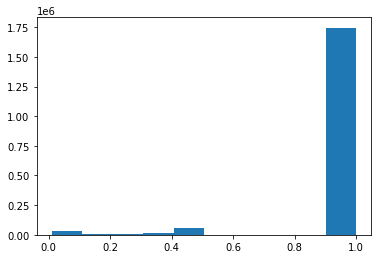

In [12]:
import matplotlib.pyplot as plt
plt.hist(prac['Count'].values)
plt.show()

In [ ]:
{"in_path": "/cndd3/mcuoco/projects/czi_diversity_rnate/results/merge_bam", 
 
 "out_path": "/cndd3/dburrows/DATA/te/rna/CZI.counts/ATEM/pseudobulk",

In [2]:
import os
import glob
os.chdir('/cndd3/mcuoco/projects/czi_diversity_rnate/results/merge_bam/')
curr_l = glob.glob('**')
curr_l

['CZI10_NOVA_220113',
 'CZI20_NOVA_220113',
 'CZI13_NOVA_211107',
 'CZI2_NOVA_210611',
 'CZI22_NOVA_220113',
 'CZI14_NOVA_220113',
 'CZI8_NOVA_210905',
 'CZI5_NOVA_210816',
 'CZI19_NOVA_220113',
 'CZI16_NOVA_220113',
 'CZI4_NOVA_210816',
 'CZI9_NOVA_210905',
 'CZI1_NOVA_210502',
 'CZI15_NOVA_220113',
 'CZI17_NOVA_220113',
 'CZI18_NOVA_220113',
 'CZI21_NOVA_220113',
 'CZI11_NOVA_220113',
 'CZI23_NOVA_220113',
 'CZI3_NOVA_210611',
 'CZI12_NOVA_211107']

In [3]:
%autoreload
import os
import json
import glob
import numpy as np
os.chdir("/cndd3/dburrows/DATA/te/rna/CZI.counts/ATEM/pseudobulk/")

for curr in curr_l:
    os.mkdir(curr)

In [19]:
my_dict = {

    "in_path":"/cndd3/dburrows/DATA/public_datasets/10x.NSCLC_tumour.5p/sep_bam/",
    "out_path":"/cndd3/dburrows/DATA/public_datasets/10x.NSCLC_tumour.5p/ATEM/",
    "bed_plus_path":"/cndd3/dburrows/DATA/te/gtf/bed/rmsk.hg38.filt-5ptrim.plus.sort.bed",
    "bed_minus_path":"/cndd3/dburrows/DATA/te/gtf/bed/rmsk.hg38.filt-5ptrim.minus.sort.bed",

}



In [20]:
import os
import glob
os.chdir('/cndd3/dburrows/DATA/public_datasets/10x.NSCLC_tumour.5p/sep_bam/')
GLU_dict = my_dict.copy()
GLU_dict['ID'] = glob.glob('**')
#GLU_dict['bam'] = list(new_b)
GLU_dict
adm.make_config(GLU_dict, '/cndd3/dburrows/CODE/te_ageing/snakemake/workflow_NSCLC/config.json')

Write successful


In [59]:
new_b = [bam_ll[i][:-4] for i in range(len(bam_ll))]

In [60]:
new_b

['CZI10_NOVA_220113/Glia_Astro',
 'CZI10_NOVA_220113/CGE_LAMP5',
 'CZI10_NOVA_220113/MGE_SST',
 'CZI10_NOVA_220113/L6',
 'CZI10_NOVA_220113/MGE_SST_CLMP',
 'CZI10_NOVA_220113/L6IT_THEMIS_CUX1',
 'CZI10_NOVA_220113/CGE_LAMP5_LHX6',
 'CZI10_NOVA_220113/L4-5IT_RORB_LRRK1',
 'CZI10_NOVA_220113/CGE_VIP',
 'CZI10_NOVA_220113/CGE_PAX6',
 'CZI10_NOVA_220113/L4-5IT_RORB_TSHZ2',
 'CZI10_NOVA_220113/L2-4IT_CUX2',
 'CZI10_NOVA_220113/L56NP_TLE4_TSHZ2',
 'CZI10_NOVA_220113/L4-5IT_RORB_ARHGAP15',
 'CZI10_NOVA_220113/Glia_Oligo',
 'CZI10_NOVA_220113/MGE_PVALB',
 'CZI10_NOVA_220113/CGE_ADARB2_ADAM33',
 'CZI10_NOVA_220113/L6IT_THEMIS_LINC00343',
 'CZI10_NOVA_220113/L3-5IT_RORB_PLCH1',
 'CZI20_NOVA_220113/MGE_SST_CLMP',
 'CZI20_NOVA_220113/L3-5IT_RORB_PLCH1',
 'CZI20_NOVA_220113/L4-5IT_RORB_TSHZ2',
 'CZI20_NOVA_220113/Glia_Oligo',
 'CZI20_NOVA_220113/CGE_ADARB2_ADAM33',
 'CZI20_NOVA_220113/MGE_PVALB',
 'CZI20_NOVA_220113/L2-4IT_CUX2',
 'CZI20_NOVA_220113/L4-5IT_RORB_ARHGAP15',
 'CZI20_NOVA_220113/MGE_SS

In [34]:
os.chdir('/cndd3/mcuoco/projects/czi_diversity_rnate/results/merge_bam/')
curr_l = glob.glob('**')
bam_ll = []
for curr in curr_l:
    bam_l = glob.glob(curr+'/*.bam')
    print(len(bam_l))
    bam_ll = np.append(bam_ll, bam_l)

19
19
19
19
18
19
19
19
19
19
19
19
19
19
18
19
18
19
19
19
19


In [8]:
import os
import glob
os.chdir('/cndd3/dburrows/DATA/te/rna/PE.bam')
l = glob.glob('*Samp**')
for n in l:
    os.mkdir('/cndd/dburrows/DATA/te/rna/PE.counts/ATEM/' + n)

In [6]:
l

['Sample_5570-GABA',
 'Sample_5086-GLU',
 'Sample_1823-GABA',
 'Sample_6285-GABA',
 'Sample_1277-GABA',
 'Sample_5976-GABA',
 'Sample_5161-GABA',
 'Sample_4411-GABA',
 'Sample_4369-GLU',
 'Sample_5326-GABA',
 'Sample_HctYPA008-GABA',
 'Sample_5309-GLU',
 'Sample_4411-GLU',
 'Sample_5871-GLU',
 'Sample_5077-GABA',
 'Sample_198034-1435-GABA',
 'Sample_5086-GABA',
 'Sample_Hct15HBNA032-GABA',
 'Sample_5936-GLU',
 'Sample_4337-GABA',
 'Sample_1241-GLU',
 'Sample_5184-GABA',
 'Sample_5918-GABA',
 'Sample_5643-GABA',
 'Sample_5387-GLU',
 'Sample_5976-GLU',
 'Sample_4725-GLU',
 'Sample_4428-GABA',
 'Sample_1539-GLU',
 'Sample_4332-GABA',
 'Sample_4379-GABA',
 'Sample_1848-GABA',
 'Sample_179134-1401-GABA',
 'Sample_Hct16HCQA020-GLU',
 'Sample_5643-GLU',
 'Sample_4321-GLU',
 'Sample_5744-GABA',
 'Sample_5401-GABA',
 'Sample_5293-GABA',
 'Sample_1133-GLU',
 'Sample_1134-GLU',
 'Sample_4425-GLU',
 'Sample_3739-GLU',
 'Sample_6285-GLU',
 'Sample_6007-GABA',
 'Sample_4425-GABA',
 'Sample_1133-GABA

In [2]:
import pandas as pd
bed_pl = pd.read_csv("/cndd3/dburrows/DATA/te/gtf/bed/rmsk.hg38.filt-5ptrim.plus.sort.bed", sep='\t', header=None)



In [4]:
bed_pl

,0,1,2,3,4,5,6,7
0,chr1,24038,24138,+,MIR,MIR,SINE,211
1,chr1,26741,26841,+,AluSp,Alu,SINE,263
2,chr1,31386,31486,+,AluJo,Alu,SINE,297
3,chr1,32791,32891,+,MIR,MIR,SINE,214
4,chr1,39574,39674,+,AluSx,Alu,SINE,300
...,...,...,...,...,...,...,...,...
548906,chrY,57200662,57200762,+,AluSg7,Alu,SINE,308
548907,chrY,57201438,57201538,+,AluSp,Alu,SINE,305
548908,chrY,57202215,57202315,+,AluSz,Alu,SINE,278
548909,chrY,57202519,57202619,+,AluSc,Alu,SINE,308


In [7]:
bed_pl.columns =['Chromosome', 'Start', 'End', 'Strand', 'gene_id', 'family_id', 'class_id', 'length']
bed_pl

,Chromosome,Start,End,Strand,gene_id,family_id,class_id,length
0,chr1,24038,24138,+,MIR,MIR,SINE,211
1,chr1,26741,26841,+,AluSp,Alu,SINE,263
2,chr1,31386,31486,+,AluJo,Alu,SINE,297
3,chr1,32791,32891,+,MIR,MIR,SINE,214
4,chr1,39574,39674,+,AluSx,Alu,SINE,300
...,...,...,...,...,...,...,...,...
548906,chrY,57200662,57200762,+,AluSg7,Alu,SINE,308
548907,chrY,57201438,57201538,+,AluSp,Alu,SINE,305
548908,chrY,57202215,57202315,+,AluSz,Alu,SINE,278
548909,chrY,57202519,57202619,+,AluSc,Alu,SINE,308


In [8]:
#drop last columns
bed_pl = bed_pl.drop(columns=['length'])
bed_pl

,Chromosome,Start,End,Strand,gene_id,family_id,class_id
0,chr1,24038,24138,+,MIR,MIR,SINE
1,chr1,26741,26841,+,AluSp,Alu,SINE
2,chr1,31386,31486,+,AluJo,Alu,SINE
3,chr1,32791,32891,+,MIR,MIR,SINE
4,chr1,39574,39674,+,AluSx,Alu,SINE
...,...,...,...,...,...,...,...
548906,chrY,57200662,57200762,+,AluSg7,Alu,SINE
548907,chrY,57201438,57201538,+,AluSp,Alu,SINE
548908,chrY,57202215,57202315,+,AluSz,Alu,SINE
548909,chrY,57202519,57202619,+,AluSc,Alu,SINE


In [1]:
#Check that all files are present
import glob
import os

full_l = os.listdir('/cndd2/Public_Datasets/Dracheva_PsychEncode_development/raw_May2022/') 
os.chdir('/cndd3/dburrows/DATA/te/rna/PE.bam/')
check_l = glob.glob('*Samp*')

import numpy as np
not_int = np.setxor1d(check_l, full_l)
assert len(full_l) == len(check_l)
assert len(not_int) == 0

In [ ]:
STAR --genomeDir /cndd2/jchien/iGenome/STAR_gencode_v37 --readFilesIn  R1-merge.fastq.gz R1-merge.fastq.gz --outSAMunmapped None --outFilterType BySJout --outSAMattributes All --outFilterMultimapNmax 100 --outFilterMismatchNmax 999 --outFilterMismatchNoverReadLmax 0.04 --alignIntronMin 20 --alignIntronMax 1000000 --alignMatesGapMax 1000000 --alignSJoverhangMin 8 --alignSJDBoverhangMin 1 --sjdbScore 1 --readFilesCommand zcat --runThreadN 16--genomeLoad LoadAndKeep --limitBAMsortRAM 10000000000 --outSAMtype BAM SortedByCoordinate --quantMode TranscriptomeSAM GeneCounts --winAnchorMultimapNmax 200 --outMultimapperOrder Random --outSAMmultNmax -1

In [76]:
# Check which files went to completion
import glob
os.chdir('/cndd/dburrows/DATA/te/rna/PE.counts/ATEM/')
curr_ = glob.glob('*Sa*')
for c in curr_:
    os.chdir(c)
    atem = glob.glob('/cndd/dburrows/DATA/te/rna/PE.counts/ATEM/' + c + '/*ATEM*')
    log = glob.glob('/cndd/dburrows/DATA/te/rna/PE.counts/ATEM/' + c + '/*log*')
    if not atem or not log:
        print(c)
    if log:
        if 'All reads accounted for' not in np.load(log[0]):
            print(c)

    os.chdir('..')